## Importing Dependencies

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, opendatasets as od, os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings                     
warnings.filterwarnings("ignore")

## Data Collection & Preprocessing

In [2]:
dataset = "https://www.kaggle.com/competitions/nlp-getting-started/data?select=train.csv"

In [3]:
od.download(dataset)

Skipping, found downloaded files in ".\nlp-getting-started" (use force=True to force download)


In [4]:
data_dir = r'.\nlp-getting-started'

In [5]:
os.listdir(data_dir)

['.ipynb_checkpoints']

In [6]:
tweets_disaster_train = pd.read_csv('train.csv')

In [7]:
tweets_disaster_test = pd.read_csv('test.csv')

In [8]:
tweets_disaster_submission = pd.read_csv('sample_submission.csv')

In [9]:
tweets_disaster_train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [10]:
tweets_disaster_train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [11]:
tweets_disaster_train.shape

(7613, 5)

In [12]:
tweets_disaster_train['keyword'].value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

In [13]:
tweets_disaster_train['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

#### predicting whether a given tweet is about a real disaster or not.
* If so, predict a 1. 
* If not, predict a 0.

## Data Visualization

In [14]:
tweets_disaster_train['keyword'].fillna('missing_word', inplace = True)
tweets_disaster_train['location'].fillna('missing_location', inplace = True)

In [16]:
tweets_disaster_train.head()

,id,keyword,location,text,target
0,1,missing_word,missing_location,Our Deeds are the Reason of this #earthquake M...,1
1,4,missing_word,missing_location,Forest fire near La Ronge Sask. Canada,1
2,5,missing_word,missing_location,All residents asked to 'shelter in place' are ...,1
3,6,missing_word,missing_location,"13,000 people receive #wildfires evacuation or...",1
4,7,missing_word,missing_location,Just got sent this photo from Ruby #Alaska as ...,1


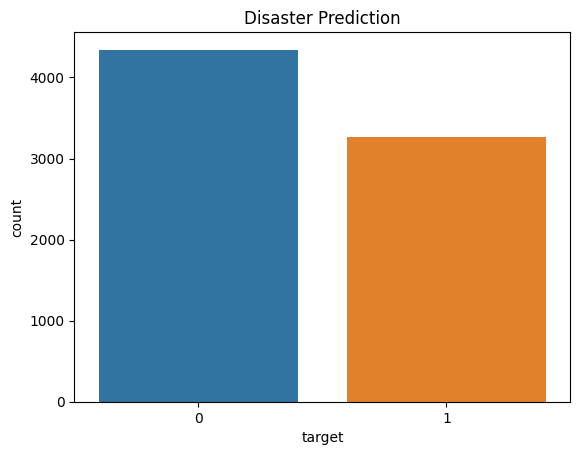

In [17]:
# Distribution of target 
sns.countplot(x = 'target', data = tweets_disaster_train)
plt.title("Disaster Prediction") 
plt.show()

In [18]:
# split the data according to "target" column 
tweets_disaster_1 = tweets_disaster_train[tweets_disaster_train['target'] == 1]
tweets_disaster_0 = tweets_disaster_train[tweets_disaster_train['target'] == 0]

In [19]:
# the most 5 location according to "target"
location_1 = tweets_disaster_1[(tweets_disaster_1['location'] != 'missing_location')]['location'].value_counts().head(5)
location_0 = tweets_disaster_0[(tweets_disaster_0['location'] != 'missing_location')]['location'].value_counts().head(5)

In [20]:
location_1.head()

location
USA              67
United States    27
Nigeria          22
India            20
Mumbai           19
Name: count, dtype: int64

In [21]:
location_0.head()

location
New York           55
USA                37
London             29
United States      23
Los Angeles, CA    18
Name: count, dtype: int64

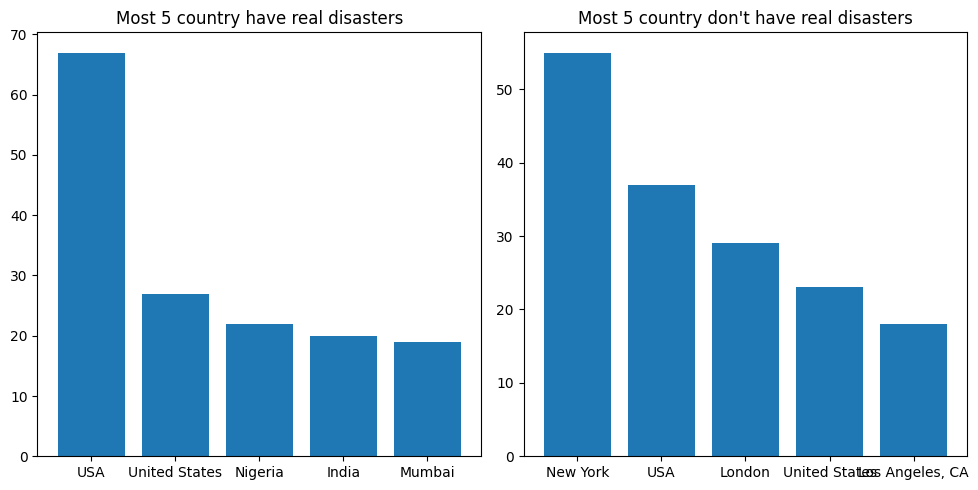

In [22]:
# plot the most 5 location 
figure, axis = plt.subplots(1, 2, figsize = (10,5))
axis[0].bar(location_1.index, location_1.values)
axis[0].set_title('Most 5 country have real disasters')

axis[1].bar(location_0.index, location_0.values)
axis[1].set_title("Most 5 country don't have real disasters")

plt.tight_layout()
plt.show()

## Spliting Data

In [23]:
x = tweets_disaster_train['text']
y = tweets_disaster_train['target']

## Train Test Split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)
print(x.shape, x_train.shape, x_test.shape)

(7613,) (6090,) (1523,)


## Features Extraction

In [25]:
# transform text to feature vectors
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

x_train_feature = feature_extraction.fit_transform(x_train)
x_test_feature = feature_extraction.transform(x_test)

In [26]:
print(x_train_feature)

  (0, 10661)	0.3213675903105281
  (0, 16059)	0.22735717289287755
  (0, 4454)	0.21125623045679642
  (0, 5842)	0.2606398153035932
  (0, 12182)	0.3213675903105281
  (0, 7849)	0.062391619928141503
  (0, 17256)	0.22489945870283523
  (0, 12321)	0.25468889333828776
  (0, 3482)	0.3213675903105281
  (0, 10997)	0.2359480228801948
  (0, 14578)	0.3213675903105281
  (0, 17177)	0.20266538046947916
  (0, 7034)	0.3213675903105281
  (0, 881)	0.3213675903105281
  (1, 13002)	0.3997816780165387
  (1, 9563)	0.4185953227447548
  (1, 2418)	0.34880589519396266
  (1, 9797)	0.291419914957883
  (1, 17100)	0.30329526373345855
  (1, 14795)	0.2978301123713865
  (1, 5648)	0.3604669241560167
  (1, 9610)	0.2523194809108824
  (1, 16133)	0.2899467703673145
  (2, 3224)	0.4046846061625915
  (2, 13413)	0.41489016468268913
  :	:
  (6086, 3864)	0.572613350540039
  (6086, 7849)	0.15624690406220487
  (6087, 5588)	0.4394268285130756
  (6087, 10478)	0.40566413320072975
  (6087, 15339)	0.3719014378883839
  (6087, 17520)	0.3859142

## Logistic Regression Model

In [27]:
LR = LogisticRegression()

In [28]:
LR.fit(x_train_feature, y_train)

LogisticRegression()

In [29]:
LR_Train_prediction = LR.predict(x_train_feature)
LR_Test_prediction = LR.predict(x_test_feature)

## Evaluation

In [30]:
# accuracy on training data
train_accuracy = accuracy_score(y_train, LR_Train_prediction)
print('Accuracy on train data:',train_accuracy)

Accuracy on train data: 0.8922824302134647


In [31]:
# accuracy on test data
test_accuracy = accuracy_score(y_test, LR_Test_prediction)
print('Accuracy on test data:',test_accuracy)

Accuracy on test data: 0.7918581746552856


## Building LSTM model

In [32]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [33]:
# Preprocess the Data
max_length = max(len(sequence.split()) for sequence in tweets_disaster_train['text'])
print("Maximum Sequence Length:", max_length)

Maximum Sequence Length: 31


In [40]:
# Tokenize the text data and pad sequences to make them of the same length.
texts_train = tweets_disaster_train['text'].values
texts_test = tweets_disaster_test['text'].values
targets = tweets_disaster_train['target'].values

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(texts_train)
tokenizer.fit_on_texts(texts_test)

train_sequences = tokenizer.texts_to_sequences(texts_train)
test_sequences = tokenizer.texts_to_sequences(texts_test)

padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

In [41]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
print(vocab_size)

29321


In [42]:
# Define LSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(units=100))
model.add(Dense(units=1, activation='sigmoid'))

In [43]:
# compile the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
# Train test split 
X_train, X_test, Y_train, Y_test = train_test_split(padded_train_sequences, targets, test_size = 0.2, random_state = 3)

In [45]:
#Train the LSTM model on your training data.
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
191/191 [==============================] - 19s 90ms/step - loss: 0.5335 - accuracy: 0.7309 - val_loss: 0.4495 - val_accuracy: 0.8024
Epoch 2/10
191/191 [==============================] - 17s 88ms/step - loss: 0.2867 - accuracy: 0.8911 - val_loss: 0.4605 - val_accuracy: 0.7965
Epoch 3/10
191/191 [==============================] - 17s 88ms/step - loss: 0.1372 - accuracy: 0.9532 - val_loss: 0.5931 - val_accuracy: 0.7748
Epoch 4/10
191/191 [==============================] - 17s 88ms/step - loss: 0.0705 - accuracy: 0.9791 - val_loss: 0.6389 - val_accuracy: 0.7774
Epoch 5/10
191/191 [==============================] - 17s 89ms/step - loss: 0.0408 - accuracy: 0.9882 - val_loss: 1.1496 - val_accuracy: 0.7676
Epoch 6/10
191/191 [==============================] - 17s 89ms/step - loss: 0.0240 - accuracy: 0.9933 - val_loss: 1.1175 - val_accuracy: 0.7735
Epoch 7/10
191/191 [==============================] - 17s 90ms/step - loss: 0.0309 - accuracy: 0.9918 - val_loss: 1.1107 - val_accuracy:

In [46]:
# accuracy on test data
loss, accuracy = model.evaluate(X_test, y_test)

48/48 [==============================] - 0s 5ms/step - loss: 1.0511 - accuracy: 0.7702


## Prediction system 

* Prediction on Logistic Regression

In [47]:
input_tweet = ["@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C"]
input_tweet_feature = feature_extraction.transform(input_tweet)

prediction = LR.predict(input_tweet_feature)
print(prediction)

if prediction[0]==1:
    print('Real Disaster')
else :
    print('Not_Real Disaster')

[1]
Real Disaster


* Prediction on LSTM Model

In [48]:
new_texts = ["@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C"]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_length, padding='post', truncating='post')

predictions = model.predict(new_padded_sequences)
print(predictions)

if predictions>= 0.5:
    print('Real Disaster')
else :
    print('Not_Real Disaster')

1/1 [==============================] - 0s 373ms/step
[[0.9994508]]
Real Disaster


## Submission 

In [49]:
prediction = model.predict(padded_test_sequences)

102/102 [==============================] - 1s 5ms/step


In [50]:
prediction = (prediction > 0.5).astype(int)

In [51]:
tweets_disaster_submission['target']= prediction

In [52]:
tweets_disaster_submission.head(10)

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0
